# Logistic Regression - Predict Brease Cancer
* Chapter 7 example simplified
* Most of code has been revised. 

## Problem Understanding
* What factors contribute to breast cancer?
* What does a predictive model look like? 

In [3]:
# --- Import Libraries ---
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Acquire and review the data
* The SKLEARN.DATASETS class has built-in datasets
* One dataset is the Wisconsin Breast Cancer
* The datatype of dataset in sklearn is **Bunch**, which has its special structure:
    * data: data of IV's or features, a NumPy array. 
    * target: data of DV's or outcomes
    * feature_names: independent variable names (column names)
    * target_names: dependent variable names
* Placing data in Bunch to a Pandas DataFrame might make our jobs easier. 

## Breast Cancer Wisconsin Dataset

**Note:**
* Binary classification
* Source: https://archive.ocs.ui.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [4]:
# --- Load sklearn datasets --
from sklearn.datasets import load_breast_cancer

In [5]:
# -- Load predefined dataset, breast_cancer --

cancer = load_breast_cancer()

In [6]:
# -- What is in a Bunch? --
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### How does the data in a bunch look like? 

In [7]:
# -- What is the data structure? --
print("Data type: ",type(cancer.data))
print("Shape: ",cancer.data.shape) ## Which shows that the dataset has 569 rows and each row has 30 columns
print("Dimension: ",cancer.data.ndim)

Data type:  <class 'numpy.ndarray'>
Shape:  (569, 30)
Dimension:  2


In [8]:
# -- What is the element (first row and first column)? --
print(cancer.data[0,0])
# -- What are the data of the first two rows and first two columns? --
print(cancer.data[:2,:2])

17.99
[[17.99 10.38]
 [20.57 17.77]]


In [9]:
# -- What are the data of the first row? --
print(cancer.data[0,:])
# -- What are the data of the first column? --
cancer.data[:,0]

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.13 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 ,
       13.44 , 10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 13.17 ,
       12.05 , 13.49 , 11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 ,
       19.21 , 14.71 , 13.05 ,  8.618, 10.17 ,  8.598, 14.25 ,  9.173,
       12.68 , 14.78 ,  9.465, 11.31 ,  9.029, 12.78 , 18.94 ,  8.888,
       17.2  , 13.8  , 12.31 , 16.07 , 13.53 , 18.05 , 20.18 , 12.86 ,
       11.45 , 13.34 , 25.22 , 19.1  , 12.   , 18.46 , 14.48 , 19.02 ,
       12.36 , 14.64 , 14.62 , 15.37 , 13.27 , 13.45 , 15.06 , 20.26 ,
       12.18 ,  9.787, 11.6  , 14.42 , 13.61 ,  6.981, 12.18 ,  9.876,
       10.49 , 13.11 , 11.64 , 12.36 , 22.27 , 11.34 ,  9.777, 12.63 ,
      

In [67]:
# -- independent variables (features) names --
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# -- target data, which is the data of dependent variable using statistic langauge. --
cancer.target[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

### Put the data in to a DataFrame

In [11]:
# -- Here, only ten features are used in the project --
cancer_df = pd.DataFrame(cancer.data[:,0:10],columns=cancer.feature_names[0:10])

# -- As you may recall, cancer.data[:,0:10] means all rows, first 10 columns from column 0 to column 9. 

In [12]:
# -- add the data of target to the dataframe and give it a column name, diagonsis --
# -- 0: malignant --
# -- 1: benign --
cancer_df['diagnosis'] = cancer.target

In [13]:
# -- add labels of diagonsis to the dataframe --
# -- 0: Malignant --
# -- 1: Benign --
cancer_df['outcome'] = cancer_df['diagnosis'].apply(lambda x: 'Benign' if(x==1) else 'Malignant')

In [14]:
# -- Dataframe shape --
cancer_df.shape

(569, 12)

In [15]:
# -- Preview the data --

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,diagnosis,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0,Malignant


### Examine relationships between features

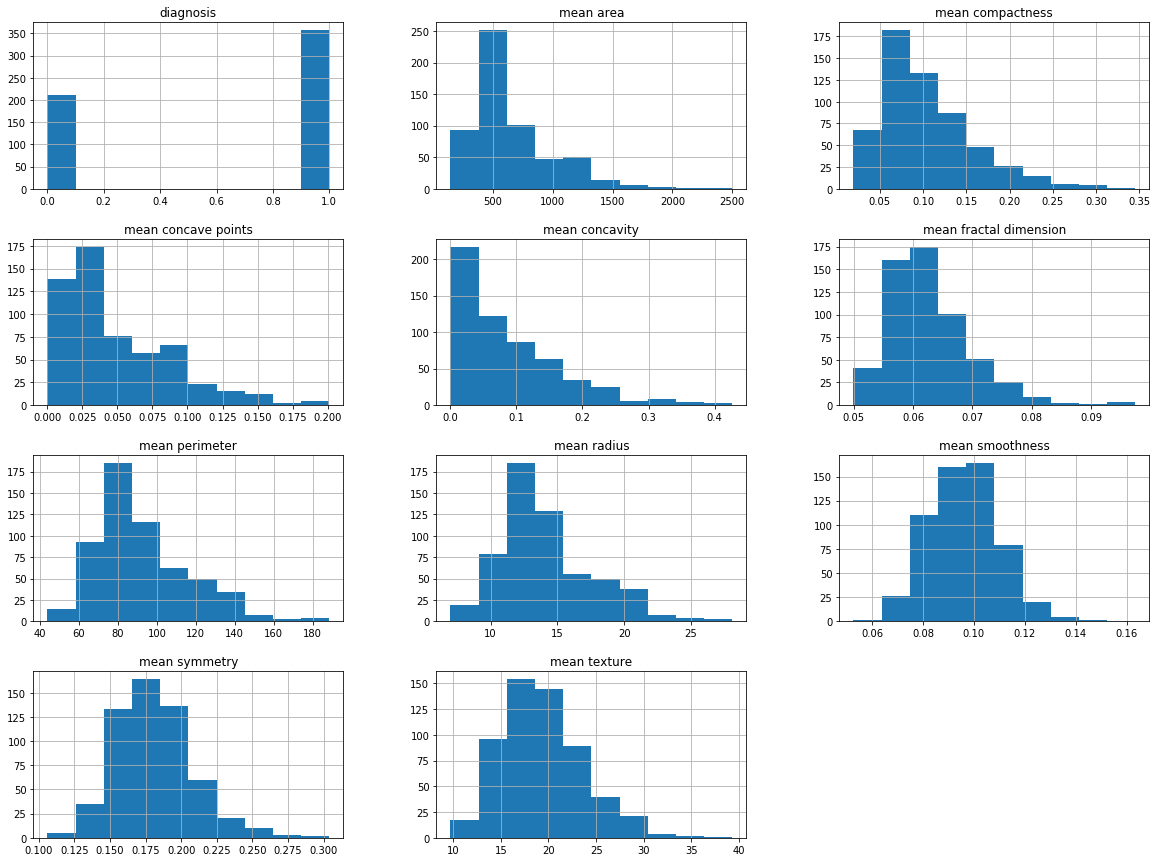

In [74]:
# -- Examine the distributin of variables --
cancer_df.hist(bins=10,figsize=(20,15))
plt.show()

In [16]:
# -- find correlations between features --
cancer_df.corr().style.background_gradient("Greens")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,diagnosis
mean radius,1,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,-0.730029
mean texture,0.323782,1,0.329533,0.321086,-0.0233885,0.236702,0.302418,0.293464,0.071401,-0.0764372,-0.415185
mean perimeter,0.997855,0.329533,1,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,-0.742636
mean area,0.987357,0.321086,0.986507,1,0.177028,0.498502,0.685983,0.823269,0.151293,-0.28311,-0.708984
mean smoothness,0.170581,-0.0233885,0.207278,0.177028,1,0.659123,0.521984,0.553695,0.557775,0.584792,-0.35856
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1,0.883121,0.831135,0.602641,0.565369,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1,0.921391,0.500667,0.336783,-0.69636
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1,0.462497,0.166917,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1,0.479921,-0.330499
mean fractal dimension,-0.311631,-0.0764372,-0.261477,-0.28311,0.584792,0.565369,0.336783,0.166917,0.479921,1,0.0128376


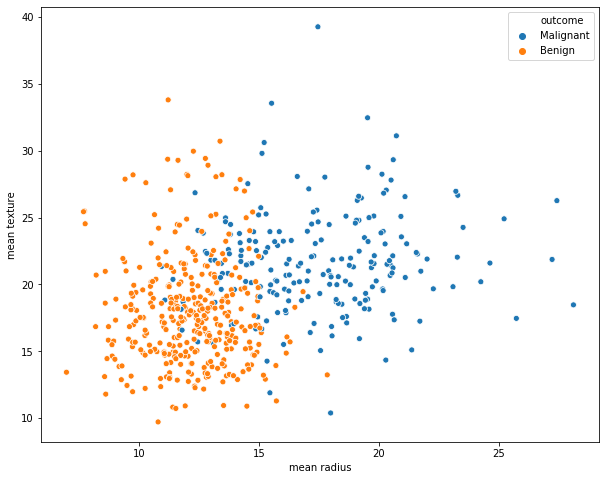

In [17]:
# -- Use DataFrame and Seaborn --

%matplotlib inline

plt.figure(figsize=(10,8)) # -- Here figsize(,) is a function to determine the size (inch) of the figure (canvas) 
sns.scatterplot(x=cancer_df['mean radius'],
                y=cancer_df['mean texture'],hue=cancer_df['outcome'])
# -- the parameter, hue, in seaborn works like a legend --

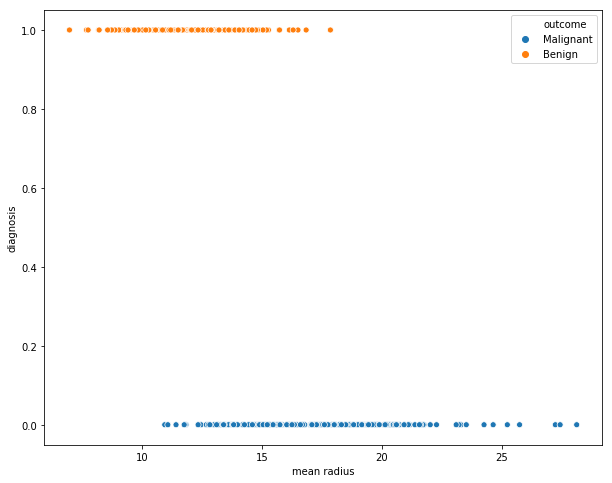

In [78]:
# -- Use DataFrame and Seaborn --
# -- See how target is related to MEAN RADIUS --
%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=cancer_df['mean radius'],
                y=cancer_df['diagnosis'],hue=cancer_df['outcome'])


## Modeling
### Train with one Feature
**Note:** Use the first feature, mean radius, to train 

In [18]:
# --- Find intercept and coefficient ---

from sklearn.linear_model import LogisticRegression

log_regress = LogisticRegression(solver='liblinear')

# --- train the model ---
x = cancer_df.iloc[:,0]
y = cancer_df['diagnosis']

log_regress.fit(X = np.array(x).reshape(-1,1), y = y) 
# Here, in reshape(-1,1), 1 means making the one-dimensional array (x) two-dimensional, -1 means that 
# accordingly arrange whatevver the data are to the row dimension. 
# Please see the example of next cell. Uncomment the code before you run it. 

# --- print trained model intercept ---
print(log_regress.intercept_)

# --- print trained model coefficient ---
print(log_regress.coef_)

[8.19393897]
[[-0.54291739]]


In [19]:
# -- Use of .reshape(1,-1) and .reshape(-1,1) --
# -- Uncomment the following code before you run it. 

np.random.seed(0)
test = np.random.randint(0,100,12) # This generates a one-dimensional array of 12 elements
print(test)
print(test.reshape(1,-1)) # This converts the array to two-dimensional (1,12). One row and 12 "columns"
print(test.reshape(1,-1).shape)
print(test.reshape(-1,1)) # This converts the array to two-dimensional (12,1) 12 rows and one "column"
print(test.reshape(-1,1).shape)

[44 47 64 67 67  9 83 21 36 87 70 88]
[[44 47 64 67 67  9 83 21 36 87 70 88]]
(1, 12)
[[44]
 [47]
 [64]
 [67]
 [67]
 [ 9]
 [83]
 [21]
 [36]
 [87]
 [70]
 [88]]
(12, 1)


#### Plot the Sigmoid Curve -- DataFrame

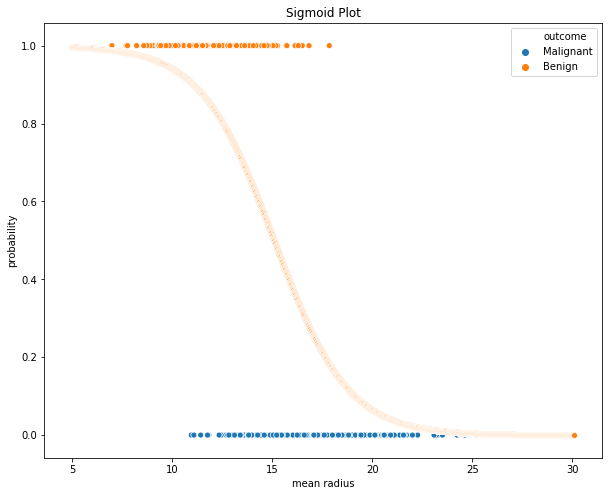

In [22]:
# -- Use DataFrame and Seaborn --

%matplotlib inline

# -- Scatter plot of MEAN RADIUS against DIAGNOSIS --
plt.figure(figsize=(10,8))
sns.scatterplot(x=cancer_df['mean radius'],
                y=cancer_df['diagnosis'],hue=cancer_df['outcome'])

# -- Plot the sigmoid function using the logistic regression model we obtained above --
def sigmoid(x):
    return (1/(1+np.exp(-(log_regress.intercept_[0] +
                         (log_regress.coef_[0][0] * x)))))

x1 = np.arange(cancer_df['mean radius'].min()-2, cancer_df['mean radius'].max()+2, 0.01)
y1 = [sigmoid(n) for n in x1]

ax = sns.scatterplot(x1,y1)
ax.set(xlabel='mean radius',
       ylabel='probability',title='Sigmoid Plot');

#### Prediction 

In [23]:
# -- Make prediction --
# -- What is the diagnosis if one person has a clump the mean radius of which is 20? --
print(log_regress.predict_proba([[20,]]))
print(log_regress.predict([[20,]])[0])

[[0.93489354 0.06510646]]
0


In [24]:
# -- Make prediction --
# -- What is the diagnosis if one person has a clump the mean radius of which is 8? --
print(log_regress.predict_proba([[8,]]))
print(log_regress.predict([[8,]])[0])

[[0.02082411 0.97917589]]
1


In [84]:
# -- Make prediction --
# -- What are the diagnoses of a group of people who have clumps of mean radius 8, 20, 7, 18, and 16? 
log_regress.predict_proba([[8,],[20,],[7,],[18,],[16,]])
log_regress.predict([[8,],[20,],[7,],[18,],[16,]])

array([1, 0, 1, 0, 0])

### Train the Model using Two Features
* We use two columns, mean radius and mean texture, to fit the model

In [85]:
# -- preview the dataset --
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,diagnosis,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0,Malignant


#### Split data into train and testing

In [25]:
# --- Split data into training and testing

from sklearn.model_selection import train_test_split
# -- train_test_split() splits data into two groups: One for training the model and 
# -- the other for testing/validating the model. --

X_train, X_test, y_train, y_test = train_test_split(cancer_df.loc[:,['mean radius','mean texture']],
                                                                 cancer_df['diagnosis'],
                                                                 test_size=0.25,
                                                                 random_state = 1,
                                                                 stratify = cancer.target)
# -- Here, the parameter, test_size = 0.25, means that we want to have 75% of data for fitting the model and 
# -- 25% for testing/validating the model. It is suggested that the training data should be more than 70% of the 
# -- whole dataset. 

X_train.head()

,mean radius,mean texture
359,9.436,18.32
48,12.050,14.63
518,12.880,18.22
226,10.440,15.46
524,9.847,15.68


#### Fit the model 

In [26]:
# -- import the Logistic Regression classifier --
from sklearn.linear_model import LogisticRegression

# -- Train the model --
x = X_train            # x = X_train[:,:]
y = y_train
log_regress = LogisticRegression(solver = 'liblinear') # -- instantiate an instance of LogisticRegression()
log_regress.fit(X = x, y = y) # -- Fit the model with the training data X and y. 

# --- Print out intercept and coefficient ---
print(log_regress.intercept_)
print(log_regress.coef_)

[7.77062817]
[[-0.47024108 -0.03471404]]


#### Prediction

In [27]:
# --- Test the Model ---
preds_prob = pd.DataFrame(log_regress.predict_proba(X = X_test))

# --- Assign column names to predictions ---
preds_prob.columns = ['Malignant','Benign']
preds_prob.head()

# -- The class (Malignant or Benign) that has probability greater than 0.5 "wins" --
# -- For example, the first row/case has 0.92 of the probability for malignance and 0.083 for benign. 
# -- So, the diagnosis would be malignant.   
# -- What is the verdict of the second case? Third? --

,Malignant,Benign
0,0.916610,0.083390
1,0.467397,0.532603
2,0.411991,0.588009
3,0.931175,0.068825
4,0.155381,0.844619


#### Comparison between predicted diagnosis and actual diagnosis

In [28]:
# --- Get the predicted class labels ---
preds = log_regress.predict(X = X_test)
preds_class = pd.DataFrame(preds)
preds_class.columns = ['Prediction']

# --- Actual diagnosis ---
original_result = pd.DataFrame(y_test.values)
original_result.columns = ['Original Result']

# --- Merge the three dataframes together ---
# -- 0: Malignant 
# -- 1: Benign
result = pd.concat([preds_prob, preds_class, original_result], axis = 1)
result.head()

,Malignant,Benign,Prediction,Original Result
0,0.916610,0.083390,0,0
1,0.467397,0.532603,1,0
2,0.411991,0.588009,1,1
3,0.931175,0.068825,0,0
4,0.155381,0.844619,1,0


### Model Performance Evaluation
#### Confusion Matrix

--- Confusion Matrix (predict on columns, actual on rows ---


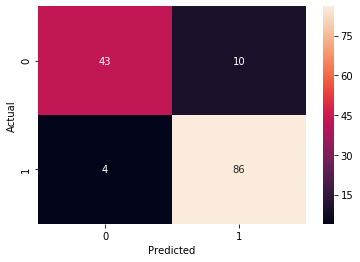

In [29]:
# --- Print Confusion Matrix Using Panda's crosstab function ---

print('--- Confusion Matrix (predict on columns, actual on rows ---')
confusion_matrix = pd.crosstab(y_test,preds,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

--- Confusion Matrix using matric function ---


Text(0.5, 15.0, 'Predicted')

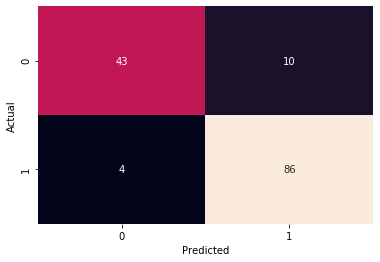

In [30]:
# --- Print Confusion Matrix using confusion_matrix() ---

print('--- Confusion Matrix using matric function ---')

from sklearn import metrics
#print(metrics.confusion_matrix(y_true = test_labels, y_pred = preds))
sns.heatmap(metrics.confusion_matrix(y_true = y_test, y_pred = preds),annot=True,cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')

--- Confusion Matrix (predict on rows, actual on columns ---


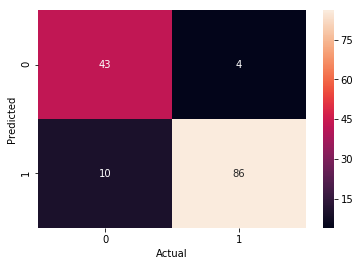

In [101]:
# --- Print Confusion Matrix Using Panda's crosstab function ---
# -- Some books (our textbook) may put Actual Results vertically -- 
# -- Uncomment the code below to run it --
# -----------------------------------------------------

print('--- Confusion Matrix (predict on rows, actual on columns ---')
confusion_matrix = pd.crosstab(preds, y_test,rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True);

#### Accuracy, Recall, Precision, and Other metrics

In [93]:
# --- Accuracy: num of correct predictions divided by the total of predictions

print('--- Accuracy ---')
print(log_regress.score(X = X_test, y = y_test))

--- Accuracy ---
0.9020979020979021


In [94]:
# View summary of common classification metrics
print('--- Metrices ---')
print(metrics.classification_report(y_true = y_test, y_pred = preds))

--- Metrices ---
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        53
           1       0.90      0.96      0.92        90

   micro avg       0.90      0.90      0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.90       143



In [102]:
print(metrics.f1_score(y_test,preds))

0.924731182795699


#### Receiver Operating Characteristic (ROC) Curve
**Note:** 
* The ROC curve is created by plotting the TPR against the FPR at various thrshold settings. 
* Threshold of 0.5: all of those predicted probabilities less than or equal to 0.5 belong to one class, while those greater than 0.5 belong to another class.

In [95]:
# --- find the prediction probabilities using the test set ---
from sklearn.metrics import roc_curve, auc
probs = log_regress.predict_proba(X_test)
preds = probs[:,1]

# --- find the FPR, TPR and threshold ---
fpr, tpr, threshold = roc_curve(y_test, preds)
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.01886792 0.01886792 0.03773585
 0.03773585 0.05660377 0.05660377 0.0754717  0.0754717  0.09433962
 0.09433962 0.11320755 0.11320755 0.1509434  0.1509434  0.16981132
 0.16981132 0.18867925 0.18867925 0.20754717 0.20754717 0.30188679
 0.30188679 1.        ]
[0.         0.01111111 0.23333333 0.23333333 0.31111111 0.31111111
 0.72222222 0.72222222 0.74444444 0.74444444 0.8        0.8
 0.84444444 0.84444444 0.85555556 0.85555556 0.92222222 0.92222222
 0.94444444 0.94444444 0.95555556 0.95555556 0.97777778 0.97777778
 1.         1.        ]
[1.96472988 0.96472988 0.87652187 0.86765059 0.85211146 0.84461867
 0.73385493 0.72822294 0.71333441 0.71095645 0.6846389  0.67549978
 0.65866032 0.64889563 0.64878734 0.62611094 0.55508916 0.54970041
 0.53541277 0.53260327 0.52523474 0.49735276 0.48854875 0.37339735
 0.30496466 0.01294595]


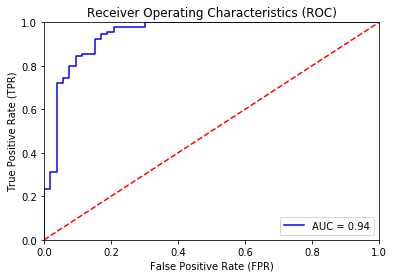

In [96]:
# --- Plot the ROC and Find AUC ---

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,'b',label = 'AUC = %0.2F' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc = 'lower right')
plt.show()